

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a time series data to be modeled and predicted using RNNs. 

In [49]:
#
# Import Libraries
import numpy as np
import pandas as pd
%matplotlib  inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
## Data

#We will use retail data for time-series modeling. 

#Link to the dataset:
# https://fred.stlouisfed.org/series/MRTSSM448USN

#Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
#https://www.census.gov/retail/marts/about_the_surveys.html

#Release: Advance Monthly Sales for Retail and Food Services  
#Units:  Millions of Dollars, Not Seasonally Adjusted
#Frequency:  Monthly

#Suggested Citation:
#U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

#https://fred.stlouisfed.org/series/RSCCASN

In [51]:
# Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.
df = pd.read_csv('MRTSSM448USN.csv',index_col='DATE',parse_dates=True)

In [52]:
# Print first few rows of data
df.head()

,MRTSSM448USN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [53]:
df.tail()

,MRTSSM448USN
DATE,
2023-08-01,27143.0
2023-09-01,23840.0
2023-10-01,24438.0
2023-11-01,29150.0
2023-12-01,41228.0


Plot your data - Year vs Sales

<Axes: xlabel='DATE'>

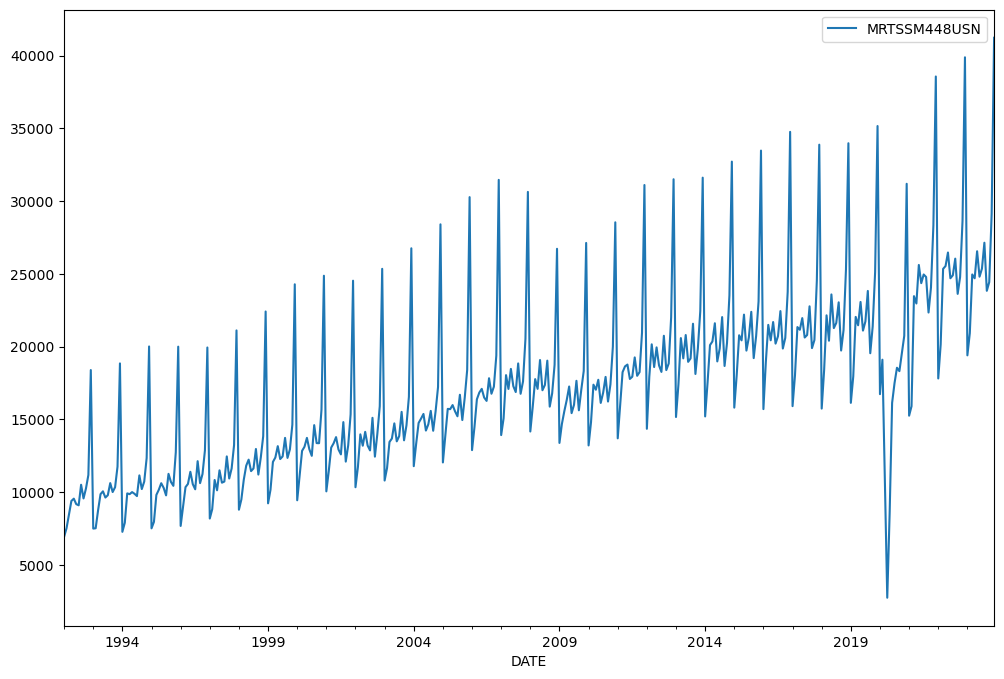

In [54]:
# Your code to plot Year vs Sales. Use either matplot library of pandas dataframe.

df.plot(figsize=(12,8))

## Next we will do Train Test Split. 

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [55]:
# Assign variable test size = 18

test_size =  18

In [56]:
# Store length of data in variable length.
data_length=len(df)
data_length

384

In [57]:
len(df)-18

366

In [58]:
# store training size in variable train_size
#(Remember training size = total size  - test_size)

train_size = data_length - test_size
train_size

366

In [59]:
#Assign the start of test index in data frame to variable test_index.  Remember, it is equal to the length of dataframe - test size

test_index = train_size

In [60]:
# Store all data from 0 to test_index in variable train. Hint - Use df.iloc.

train = df.iloc[:test_index]
test = df.iloc[:test_index]


In [61]:
# Print the size of the train data
print(train_size)

# Print the size of the test data
print(test_size)
# Print the train data
# Print the test data

366
18


In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()
scaler.fit(train)





MinMaxScaler()

In [64]:
scaled_train = scaler.transform(train)
scaled_test=scaler.transform(test)


In [65]:
#
# Check if the data has been scaled properly
print(scaled_train.max())
print(scaled_train.min())
print(scaled_test.min())
print(scaled_test.max())


1.0
0.0
0.0
1.0


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# Example dummy data for illustration purposes
import numpy as np

# Assuming you have your data stored in arrays or dataframes
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])  # Example feature data
y = np.array([0, 1, 0, 1])  # Example labels

# Now you can split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)



Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

Next, we will separate train and test datasets.

## In Neural Networks, we need to Scale Data between 0-1

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

# We will use 12 months as input and then predict the next month out


In [68]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [70]:
X, y = generator[0]

In [71]:
x_train, y_train = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11688819 0.13325142 0.15980677 0.18566402 0.19004803 0.17954875
 0.17734279 0.21671507 0.19046688 0.20948285 0.23553557 0.43680889]
Predict this y: 
 [[0.1326371]]


### Create the Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
import tensorflow as tf

In [73]:
# We're only using one feature in our time series
n_features = 1

# Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [107]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Define the number of features
n_features = 1
length = 12  # Assuming this is defined somewhere in your code

# Define your TensorFlow model
model = Sequential([
    Dense(64, activation='relu', input_shape=(length, n_features)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 unit for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [108]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12, 64)            128       
                                                                 
 dense_13 (Dense)            (None, 12, 32)            2080      
                                                                 
 dense_14 (Dense)            (None, 12, 1)             33        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2241 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [109]:
validation_generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split


# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=4)




In [110]:
history = model.fit(validation_generator, epochs=30, callbacks=[early_stop])


Epoch 1/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0211 - mae: 0.1032
Epoch 2/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0196 - mae: 0.0998
Epoch 3/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0193 - mae: 0.0991
Epoch 4/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0190 - mae: 0.0985
Epoch 5/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0187 - mae: 0.0962
Epoch 6/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0181 - mae: 0.0943
Epoch 7/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0185 - mae: 0.0959
Epoch 8/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0183 - mae: 0.0940
Epoch 9/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0180 - mae: 0.0939
Epoch 10/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0179 - mae: 0.0931
Epoch 11/30
354/354 [============================

Now, fit your model.

In [95]:
# Get Losses from dataframe (hint - model.history.history)- See previous week tutorial.
# Plot losses in the dataframe.
losses = pd.DataFrame(model.history.history)

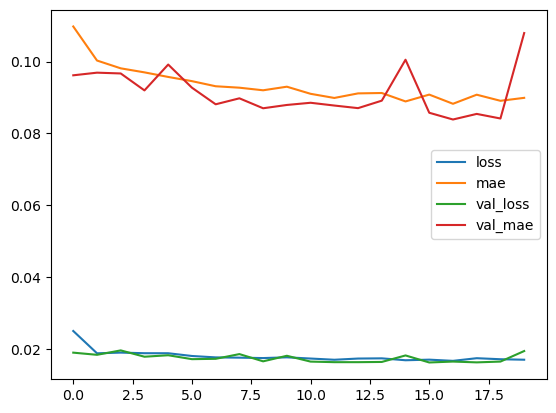

In [96]:
losses.plot();

## Evaluate on Test Data

In [97]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.62015526],
       [0.6153524 ],
       [0.54716296],
       [0.59505194],
       [0.7145091 ],
       [1.        ],
       [0.42066905],
       [0.48587066],
       [0.63093377],
       [0.6362951 ],
       [0.66229197],
       [0.61289512]])

In [98]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.62015526],
        [0.6153524 ],
        [0.54716296],
        [0.59505194],
        [0.7145091 ],
        [1.        ],
        [0.42066905],
        [0.48587066],
        [0.63093377],
        [0.6362951 ],
        [0.66229197],
        [0.61289512]]])

#### Try predicting the series!

In [100]:
import numpy as np

# Assuming first_eval_batch is your input data
# Reshape first_eval_batch to have shape (None, 1)
first_eval_batch_reshaped = first_eval_batch.reshape(-1, 1)

# Now you can use model.predict with first_eval_batch_reshaped
model.predict(first_eval_batch_reshaped)


1/1 [==============================] - 0s 149ms/step


array([[0.5965579 ],
       [0.59616804],
       [0.5758234 ],
       [0.59449553],
       [0.60385096],
       [0.6261319 ],
       [0.5007988 ],
       [0.53945196],
       [0.597391  ],
       [0.5978054 ],
       [0.5998147 ],
       [0.59596556]], dtype=float32)

In [204]:
test_predictions = []

# Assuming `test` is a numpy array
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    # Get prediction 1 time step ahead
    current_pred = model.predict(current_batch)[0]
    
    # Store prediction
    test_predictions.append(current_pred) 
    
    # Update batch to now include prediction and drop first value
 # Update batch to now include prediction and drop first value
# Update batch to now include prediction and drop first value
current_batch = np.append(current_batch[:, 1:, :], np.expand_dims(current_pred, axis=1), axis=1)



1/1 [==============================] - 0s 17ms/step


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 12

## Inverse Transformations and Compare

In [114]:


# Reshape test_predictions to 2D array
test_predictions_reshaped = np.array(test_predictions).reshape(-1, 1)

# Use inverse_transform on the reshaped array
true_predictions = scaler.inverse_transform(test_predictions_reshaped)


In [125]:
# Assuming test is your DataFrame
# Truncate true_predictions to match the length of the index
truncated_predictions = true_predictions[:len(test)]

# Create a new DataFrame with the truncated predictions and aligned index
predictions_df = pd.DataFrame(data=truncated_predictions, index=test.index, columns=['Predictions'])

# Assign the predictions to a new column in the original DataFrame
#test['Predictions'] = predictions_df['Predictions']
# Assign the predictions to a new column in the original DataFrame using .loc[]
test.loc[:, 'Predictions'] = predictions_df['Predictions']



C:\Users\BABATUNDE\AppData\Local\Temp\ipykernel_9180\1650639784.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Predictions'] = predictions_df['Predictions']


# Check and plot predictions

In [126]:
# Print the test variable.
test

,MRTSSM448USN,Predictions
DATE,,
1992-01-01,6938.0,20551.029297
1992-02-01,7524.0,20558.503906
1992-03-01,8475.0,20506.968750
1992-04-01,9401.0,20589.552734
1992-05-01,9558.0,20404.134766
...,...,...
2022-02-01,20152.0,20558.503906
2022-03-01,25347.0,20506.968750
2022-04-01,25539.0,20589.552734


<Axes: xlabel='DATE'>

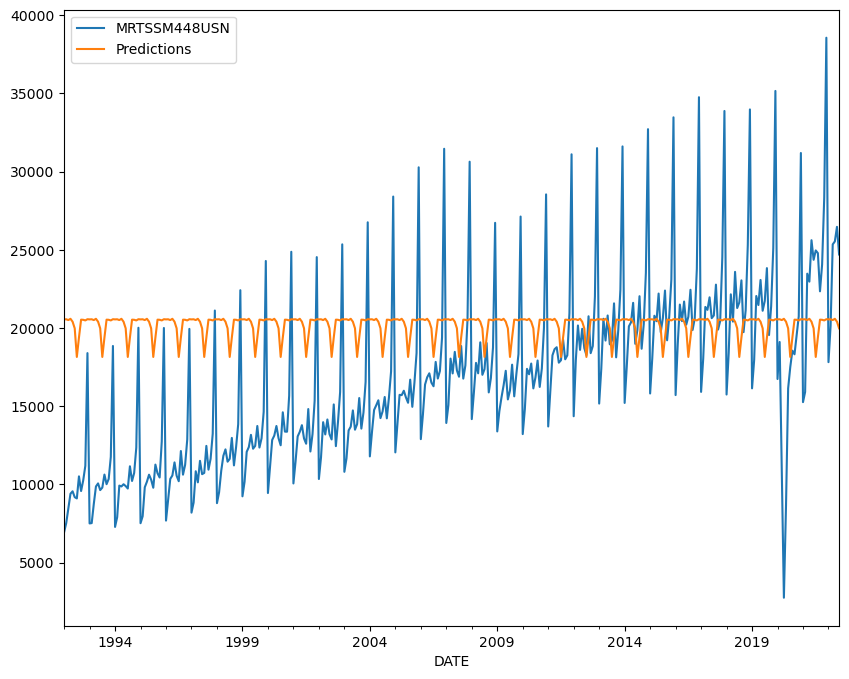

In [127]:
# Your code to plot actual sales and predictions.
test.plot(figsize=(10,8))

# Retrain and Forecasting

In [128]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [129]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [165]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(length, n_features)),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer with 1 unit for regression
])


In [166]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12, 32)            64        
                                                                 
 dense_25 (Dense)            (None, 12, 16)            528       
                                                                 
 dense_26 (Dense)            (None, 12, 1)             17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [167]:
model.compile(optimizer='adam', loss='mse')

In [168]:
early_stop = EarlyStopping(monitor='val_loss', patience=4)



In [169]:
history = model.fit(validation_generator, epochs=30, callbacks=[early_stop])


Epoch 1/30
354/354 [==============================] - 3s 2ms/step - loss: 0.0223
Epoch 2/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0191
Epoch 3/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0185
Epoch 4/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0183
Epoch 5/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0182
Epoch 6/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0180
Epoch 7/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0179
Epoch 8/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0177
Epoch 9/30
354/354 [==============================] - 1s 1ms/step - loss: 0.0177
Epoch 10/30
354/354 [==============================] - 1s 1ms/step - loss: 0.0181
Epoch 11/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0174
Epoch 12/30
354/354 [==============================] - 1s 2ms/step - loss: 0.0176
Epoch 13/30
354/354 [====

In [177]:
# Define a generator function to yield batches of data
def data_generator(data, length, n_features):
    while True:
        for start_index in range(len(data) - length):
            yield data[start_index:start_index+length], data[start_index+length]

# Initialize an empty list to store the predictions
test_predictions = []

# Create a generator object
data_gen = data_generator(scaled_train, length, n_features)

# Iterate over the generator to generate predictions
for i in range(len(test)):
    # Get a batch of data from the generator
    current_batch, current_pred = next(data_gen)
    
    # Reshape current_batch to match the input shape of the model
    current_batch = np.expand_dims(current_batch, axis=0)
    
    # Get the prediction from the model
    current_pred = model.predict(current_batch)[0]
    
    # Store the prediction
    test_predictions.append(current_pred)


1/1 [==============================] - 0s 2ms/step


In [181]:
import numpy as np

# Convert forecast to numpy array if it's a list
if isinstance(forecast, list):
    forecast = np.array(forecast)

# Check if forecast is not empty and has the correct shape
if forecast.size > 0:
    # Reshape forecast to 2D array if it has more than two dimensions
    if len(forecast.shape) > 2:
        forecast = forecast.reshape(-1, forecast.shape[-1])
    
    # Apply inverse_transform
    forecast = scaler.inverse_transform(forecast)
else:
    print("No forecast data available.")


In [183]:
forecast


array([[19984.861],
       [19859.09 ],
       [19798.057],
       [18120.889],
       [19282.156],
       [19947.084],
       [19941.438],
       [19914.068],
       [19966.076],
       [19966.076],
       [19966.076],
       [19966.076]], dtype=float32)

### Creating new timestamp index with pandas.

In [184]:
df

,MRTSSM448USN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2023-08-01,27143.0
2023-09-01,23840.0
2023-10-01,24438.0


In [185]:
forecast_index = pd.date_range(start='2020-02-01',periods=periods,freq='MS')

In [186]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [187]:
forecast_df

,Forecast
2020-02-01,19984.861328
2020-03-01,19859.089844
2020-04-01,19798.056641
2020-05-01,18120.888672
2020-06-01,19282.156250
2020-07-01,19947.083984
2020-08-01,19941.437500
2020-09-01,19914.068359
2020-10-01,19966.076172
2020-11-01,19966.076172


In [189]:
# Print the column names in your DataFrame
print(df.columns)


Index(['MRTSSM448USN'], dtype='object')


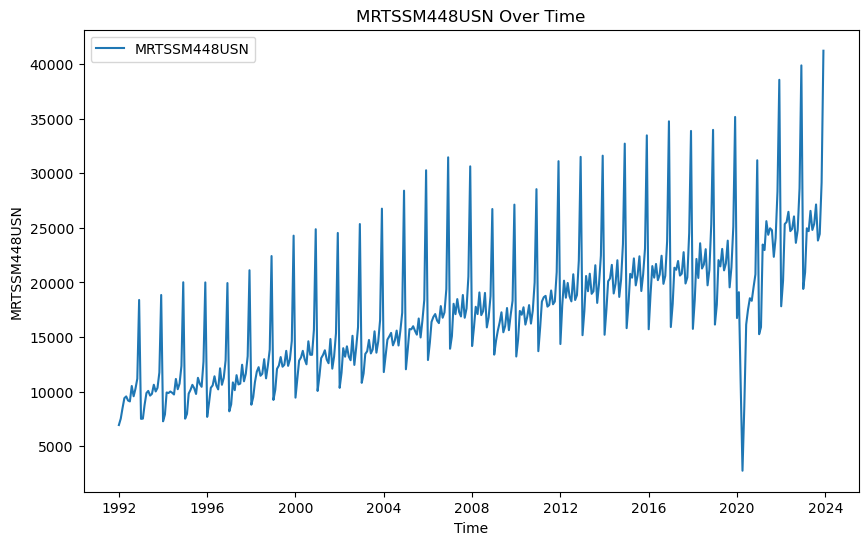

In [194]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and it has a column named 'Sales'
plt.figure(figsize=(10, 6))
plt.plot(df['MRTSSM448USN'], label='MRTSSM448USN')
plt.xlabel('Time')
plt.ylabel('MRTSSM448USN')
plt.title('MRTSSM448USN Over Time')
plt.legend()
plt.show()



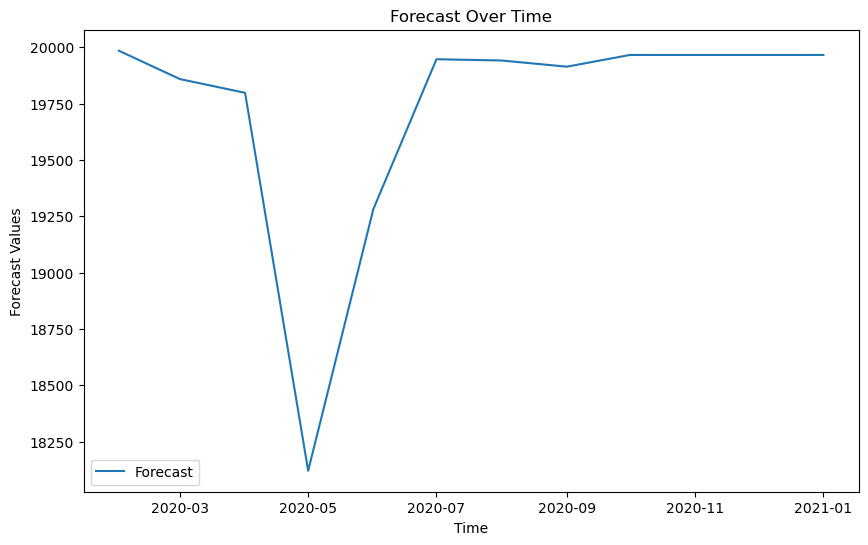

In [201]:
import matplotlib.pyplot as plt

# Assuming forecast_df is the DataFrame containing the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.xlabel('Time')
plt.ylabel('Forecast Values')
plt.title('Forecast Over Time')
plt.legend()
plt.show()


### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

<Axes: xlabel='DATE'>

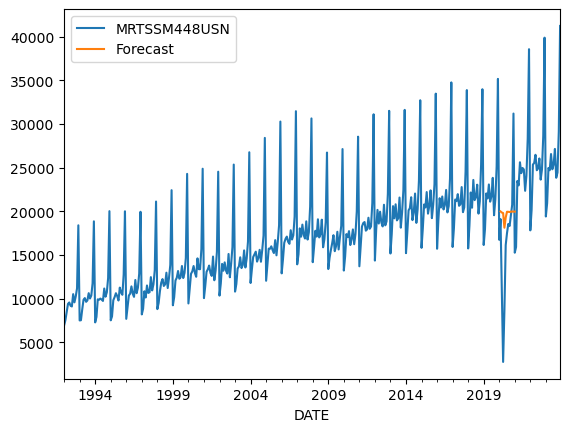

In [202]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 612.0)

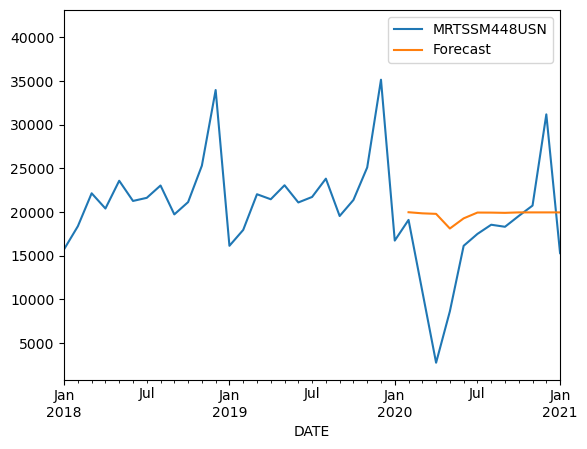

In [203]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2021-01-01')

# Try the same example with a LSTM and GRU! 
Hint: Use LSTM instead of SimpleRNN!